In [5]:
from pycocotools.coco import COCO

dataDir = "dataset/train2014"
dataType = "train2014"
annFile = "dataset/annotations/instances_train2014.json"
imageDir = "dataset/train2014/"

# Initialize the COCO api for instance annotations
coco = COCO(annFile)


loading annotations into memory...
Done (t=4.18s)
creating index...
index created!


In [2]:
categories = coco.loadCats(coco.getCatIds())
for cat in categories:
    print(f"ID: {cat['id']}, Name: {cat['name']}")

ID: 1, Name: person
ID: 2, Name: bicycle
ID: 3, Name: car
ID: 4, Name: motorcycle
ID: 5, Name: airplane
ID: 6, Name: bus
ID: 7, Name: train
ID: 8, Name: truck
ID: 9, Name: boat
ID: 10, Name: traffic light
ID: 11, Name: fire hydrant
ID: 13, Name: stop sign
ID: 14, Name: parking meter
ID: 15, Name: bench
ID: 16, Name: bird
ID: 17, Name: cat
ID: 18, Name: dog
ID: 19, Name: horse
ID: 20, Name: sheep
ID: 21, Name: cow
ID: 22, Name: elephant
ID: 23, Name: bear
ID: 24, Name: zebra
ID: 25, Name: giraffe
ID: 27, Name: backpack
ID: 28, Name: umbrella
ID: 31, Name: handbag
ID: 32, Name: tie
ID: 33, Name: suitcase
ID: 34, Name: frisbee
ID: 35, Name: skis
ID: 36, Name: snowboard
ID: 37, Name: sports ball
ID: 38, Name: kite
ID: 39, Name: baseball bat
ID: 40, Name: baseball glove
ID: 41, Name: skateboard
ID: 42, Name: surfboard
ID: 43, Name: tennis racket
ID: 44, Name: bottle
ID: 46, Name: wine glass
ID: 47, Name: cup
ID: 48, Name: fork
ID: 49, Name: knife
ID: 50, Name: spoon
ID: 51, Name: bowl
ID: 5

In [3]:
from dataset import COCODatasetLOADER, COCODatasetMAKER

dataset = COCODatasetMAKER(coco, imageDir, size=(512, 512))



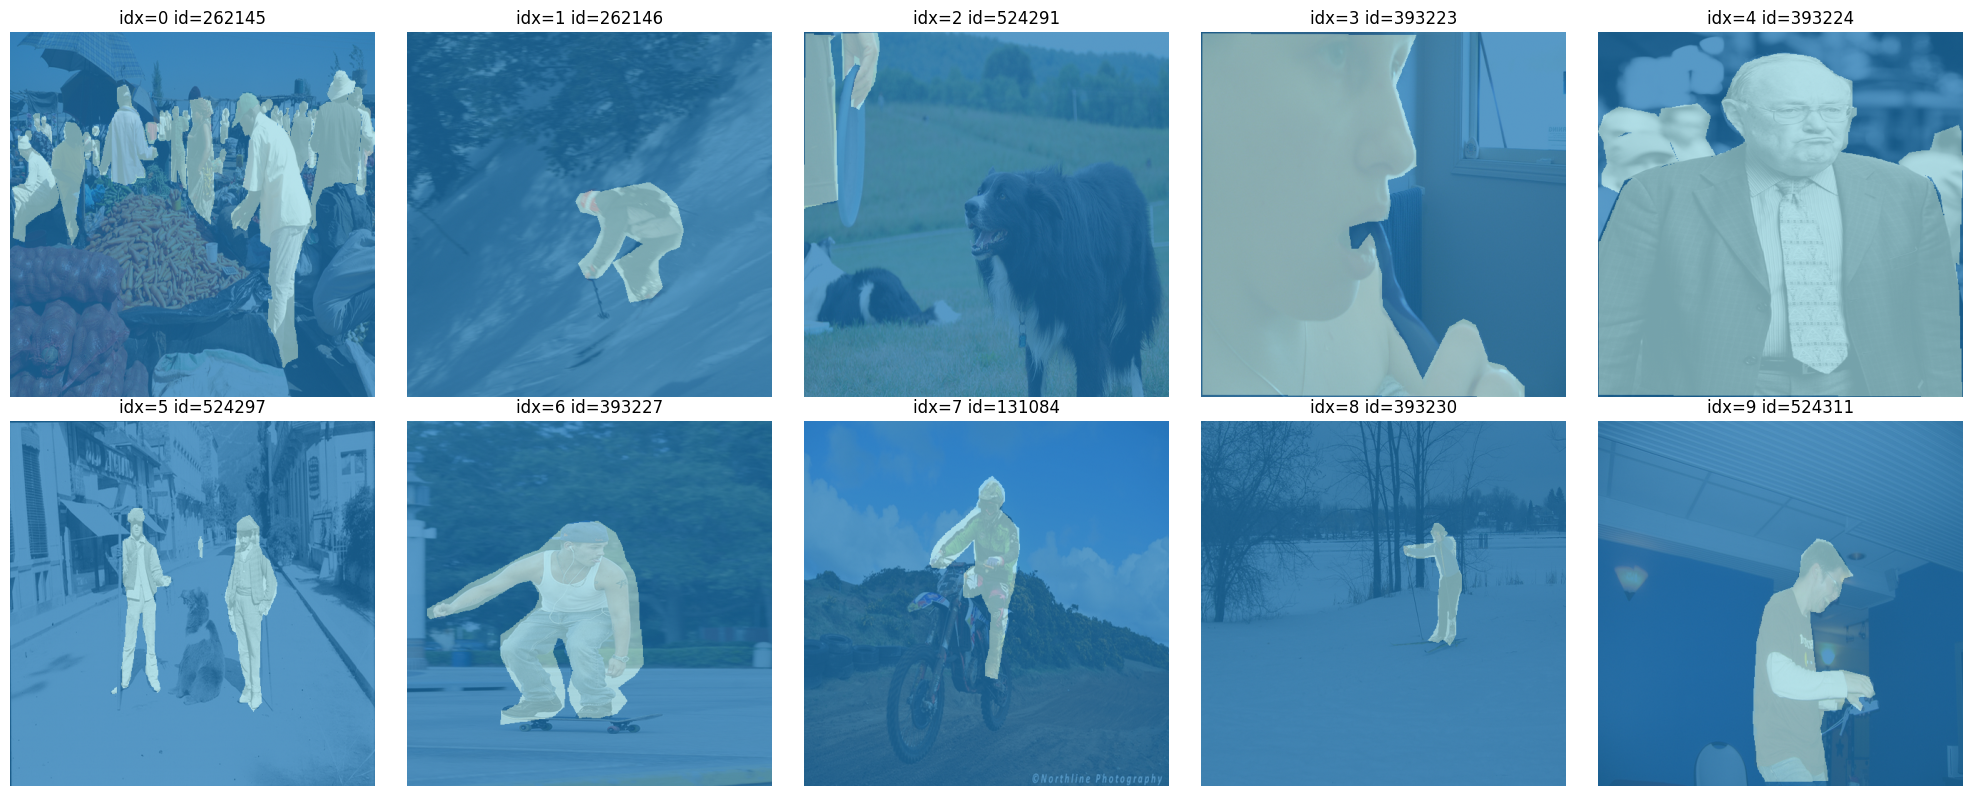

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

n = min(10, len(dataset))
cols = 5
rows = (n + cols - 1) // cols
fig, axs = plt.subplots(rows, cols, figsize=(4 * cols, 4 * rows))
axs = axs.flatten()

for i in range(n):
    image_id, mask = dataset[i]
    image_info = coco.loadImgs([image_id])[0]
    image_path = f"{imageDir}/{image_info['file_name']}"
    image = Image.open(image_path).convert("RGB").resize((512, 512))
    image_np = np.array(image).astype(np.float32) / 255.0
    mask_np = mask.cpu().numpy()

    axs[i].imshow(image_np)
    axs[i].imshow(mask_np, cmap="tab20", alpha=0.75)
    axs[i].axis("off")
    axs[i].set_title(f"idx={i} id={image_id}")

for j in range(n, len(axs)):
    axs[j].axis("off")

plt.tight_layout()
plt.show()